In [1]:
import seaborn as sns
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [3]:
deals= pd.read_csv('Sample_Data_Deals2.csv')
deals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   OrderID        100 non-null    object
 1   OrderQuantity  100 non-null    int64 
 2   OrderValue     100 non-null    int64 
 3   Country        100 non-null    object
 4   Industry       100 non-null    object
 5   Deal Status    100 non-null    object
dtypes: int64(2), object(4)
memory usage: 4.8+ KB


In [4]:
deals.mean(numeric_only=True)

OrderQuantity    185.16
OrderValue       178.50
dtype: float64

In [5]:
deals.describe(include='O')

,OrderID,Country,Industry,Deal Status
count,100,100,100,100
unique,5,5,7,2
top,OD38231,Germany,Manufacturing,Won
freq,36,36,29,54


<Axes: xlabel='Deal Status'>

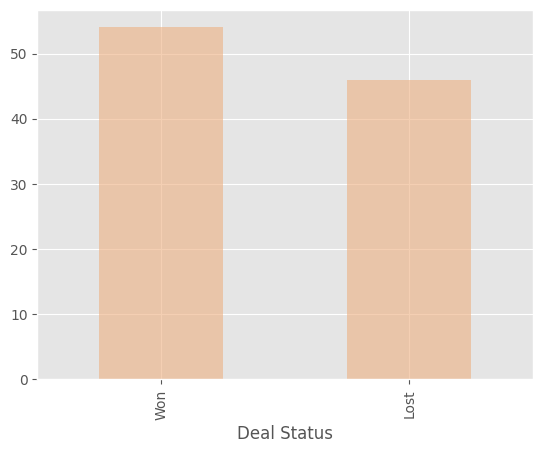

In [23]:
#Count the total number of deals in each stage, horizontal bar plot
deals['Deal Status'].value_counts().sort_index(ascending=False).plot(kind='bar', colormap='flare', alpha=0.6)

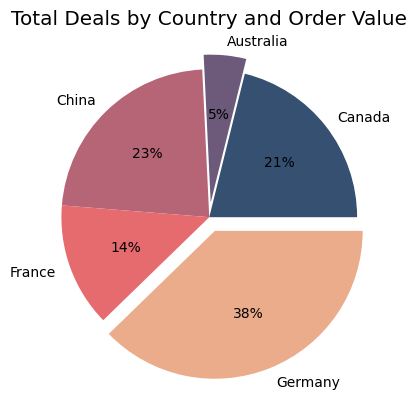

In [57]:
#Group deals by Country and OrderValue
gbo2=deals.groupby('Country')['OrderValue']
df2=gbo2.sum()
colors = ["#355070", "#6d597a", "#b56576", "#e56b6f", "#eaac8b"]
labels = ['Canada', 'Australia', 'China', 'France','Germany']

plt.pie(df2,labels=labels,colors=colors, explode=(0,0.1,0,0,0.1),autopct='%1.0f%%')
plt.title('Total Deals by Country and Order Value')
plt.show()


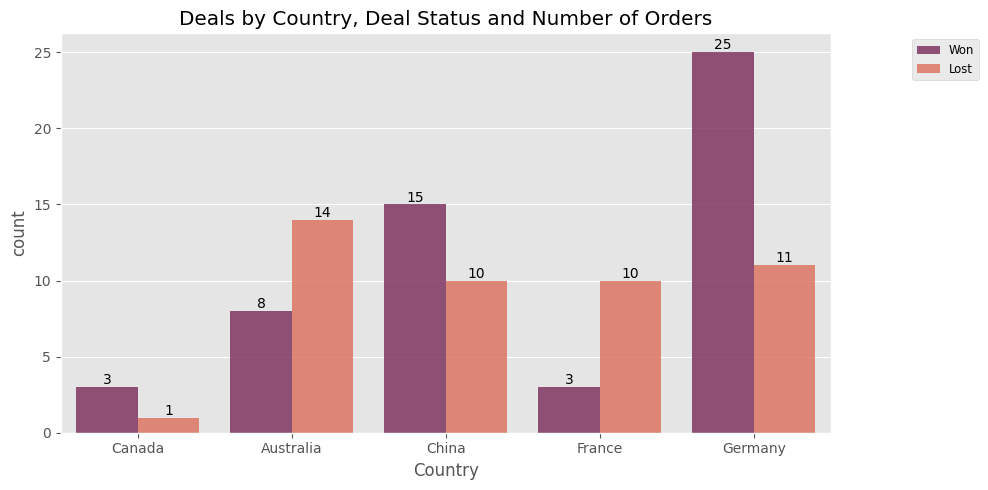

In [59]:
#Count the number of deals in each Stage by Country
#In which country did the company win the most number of deals? Answer: Germany.
fig=plt.figure(figsize=(10,5))
ax=sns.countplot(x='Country', data=deals, hue='Deal Status', palette='rocket', alpha=0.8)
#ax.bar_label(ax.containers[0:2], fontsize=10);
plt.legend(fontsize='small', loc='upper right', bbox_to_anchor=(1.2, 1))
plt.title('Deals by Country, Deal Status and Number of Orders')
plt.tight_layout()
for container in ax.containers:
    ax.bar_label(container)

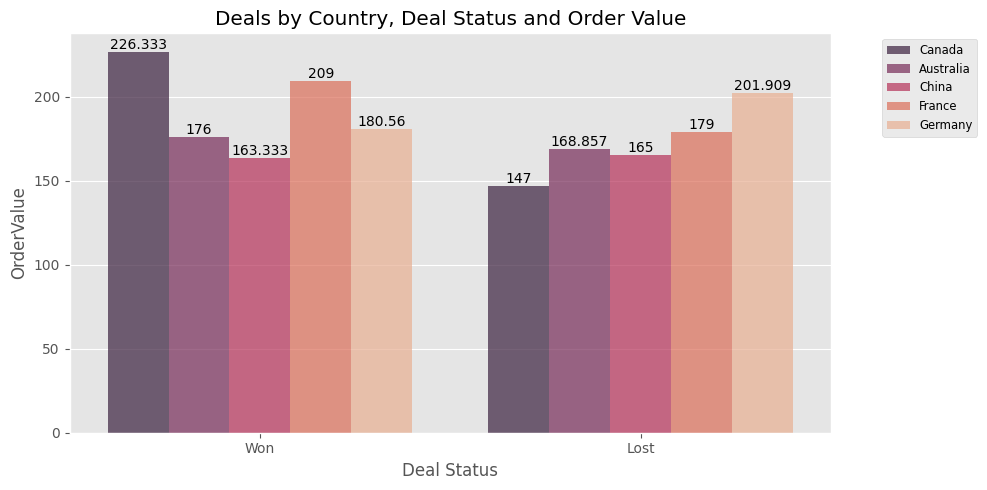

In [113]:
#Deals worth how much were lost in Germany?
fig=plt.figure(figsize=(10,5))
r=sns.barplot(x='Deal Status',y='OrderValue',data=deals, 
            hue='Country', palette='rocket', alpha=0.7, errorbar=None)
for container in r.containers:
    r.bar_label(container)
plt.legend(fontsize='small', loc='upper right', bbox_to_anchor=(1.2, 1))
plt.title('Deals by Country, Deal Status and Order Value')
plt.tight_layout()  # Adjust layout to prevent label cutoff#


<Figure size 1700x700 with 0 Axes>

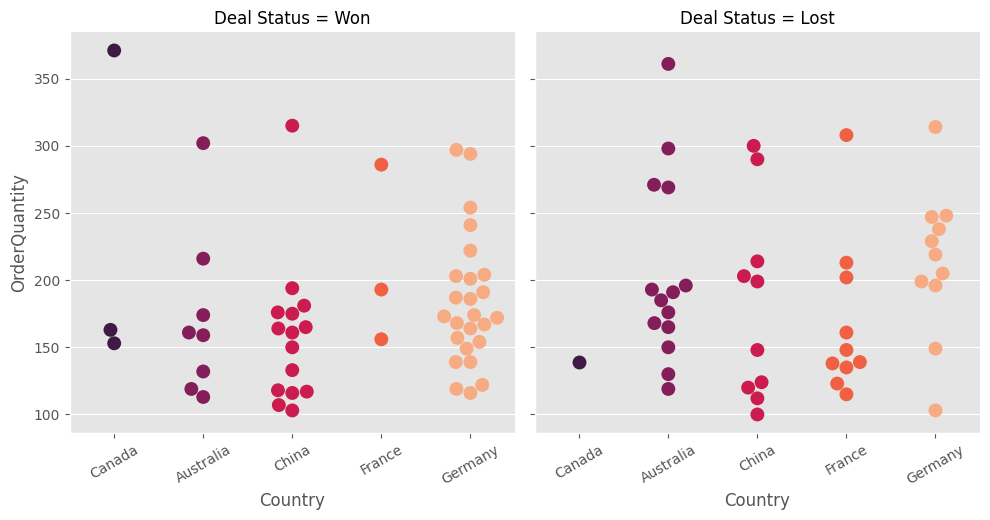

In [63]:
#Most of the high quantity deals (greater than 300) were lost in which country?
plt.figure(figsize=(17,7))
plt.style.use('ggplot')
plt.tight_layout()  # Adjust layout to prevent label cutoff
g=sns.catplot(
    data=deals, kind="swarm",
    x="Country", y="OrderQuantity", 
    hue='Country',col="Deal Status", palette="rocket", size=10, legend=False
)
# set rotation
g.set_xticklabels(rotation=30) 
plt.show()
#plt.legend(fontsize='small', loc='upper right', bbox_to_anchor=(1.2, 1))

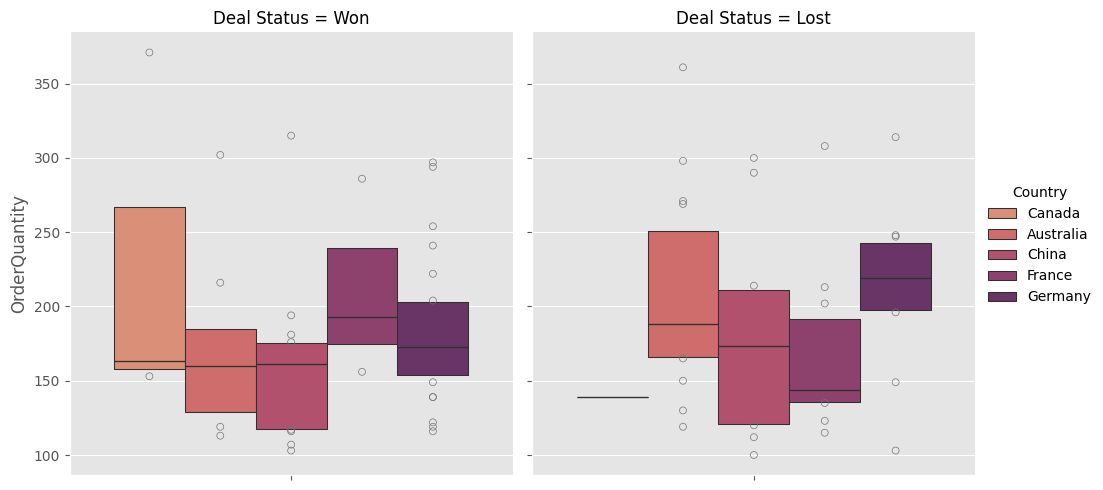

In [116]:
#Box plot with outliers
sns.catplot(
    data=deals, kind="boxen",
    y="OrderQuantity",
    hue='Country',col="Deal Status", palette="flare")
plt.show()

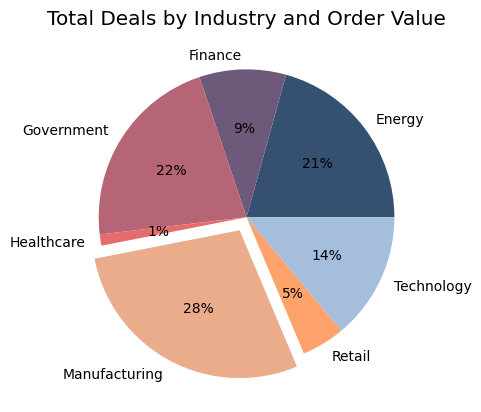

In [76]:
#Group deals by Industry and OrderValue
gbo=deals.groupby('Industry')['OrderValue']
df=gbo.sum()
colors = ["#355070", "#6d597a", "#b56576", "#e56b6f", "#eaac8b","#ffa26b","#a5bedc"]
labels = ['Energy', 'Finance', 'Government', 'Healthcare','Manufacturing', 'Retail', 'Technology']

plt.pie(df,labels=labels,colors=colors, explode=(0,0,0,0,0.1,0,0),autopct='%1.0f%%')
plt.title('Total Deals by Industry and Order Value')
plt.show()

<Figure size 1300x500 with 0 Axes>

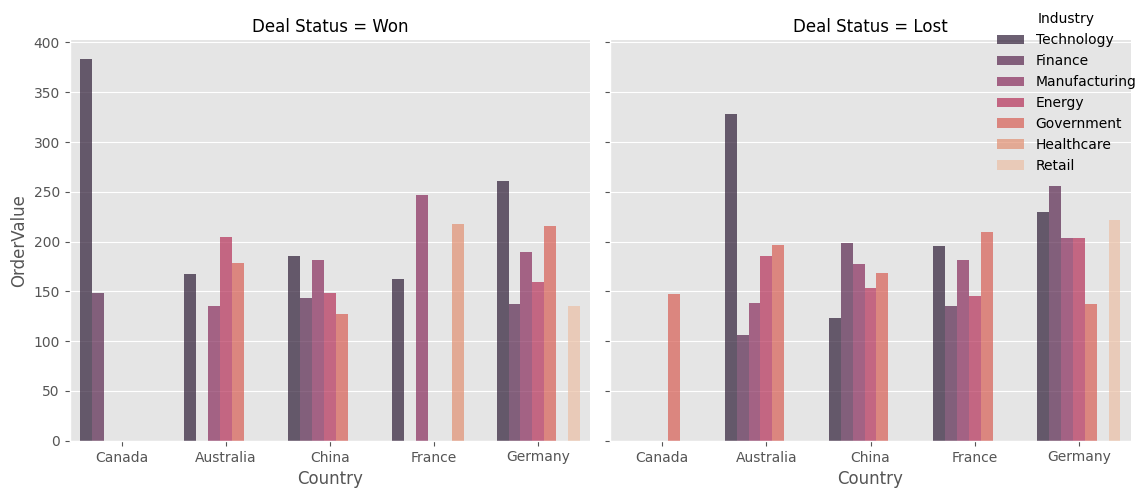

In [115]:
#Deals are most likely to be won in which Country-Industry combination? Answer: Canada-Technology
fig=plt.figure(figsize=(13,5))
ax=sns.catplot(x='Country',y='OrderValue',data=deals, kind='bar', 
            hue='Industry', col="Deal Status",palette='rocket', alpha=0.7, errorbar=None)
sns.move_legend(ax, "upper right")
plt.tight_layout()  # Adjust layout to prevent label cutoff#
plt.show()